This notebook solves the problem for worksheet 4

In [1]:
# importing librarires
import numpy as np
import matplotlib.pyplot as plt

# Generalized RK4 method and its implementation on Lorenz system.

In [2]:
# definning function for genralized RK4 integration

def RK4(q, derivs, t, h):
    """
    Generalized RK4 integrator.

    Parameters:
    ==========================================
    q:      initial parameters
    derivs: function to compute the derivatives
    t:      Current time
    h:      step size
    """

    k1 = h*derivs(t, q)
    k2 = h*derivs(t + 0.5*h, q + 0.5*k1)
    k3 = h*derivs(t + 0.5*h, q + 0.5*k2)
    k4 = h*derivs(t + h, q + k3)

    q1 = q + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([q1])

In [4]:
# defining derivative function for lorenz system
def lorenz_derivs(t, q):
    """
    Lorenz system of ODEs.

    Parameters:
    ==========================================
    q:      initial parameters
    t:      Current time
    """
    # initializing the parameters
    sigma = 10
    rho = 28
    beta = 8/3

    #storing currrent values of q in x, y, z
    x, y, z = q

    # computing the derivatives
    return np.array([sigma*(y - x), x*(rho - z) - y, x*y - beta*z])

In [53]:
# initializing the initial paramters
q = np.array([[0,1,0]])

# time array
t_start = 0
t_end   = 50
N = 10000 #number of time stamps
h = (t_end - t_start)/N
t = np.linspace(t_start, t_end, N+1)

# updating the parameters using RK4
for i in range(N):
    q1 = RK4(q[-1], lorenz_derivs, t[i], h)
    q = np.concatenate((q, q1), axis=0)


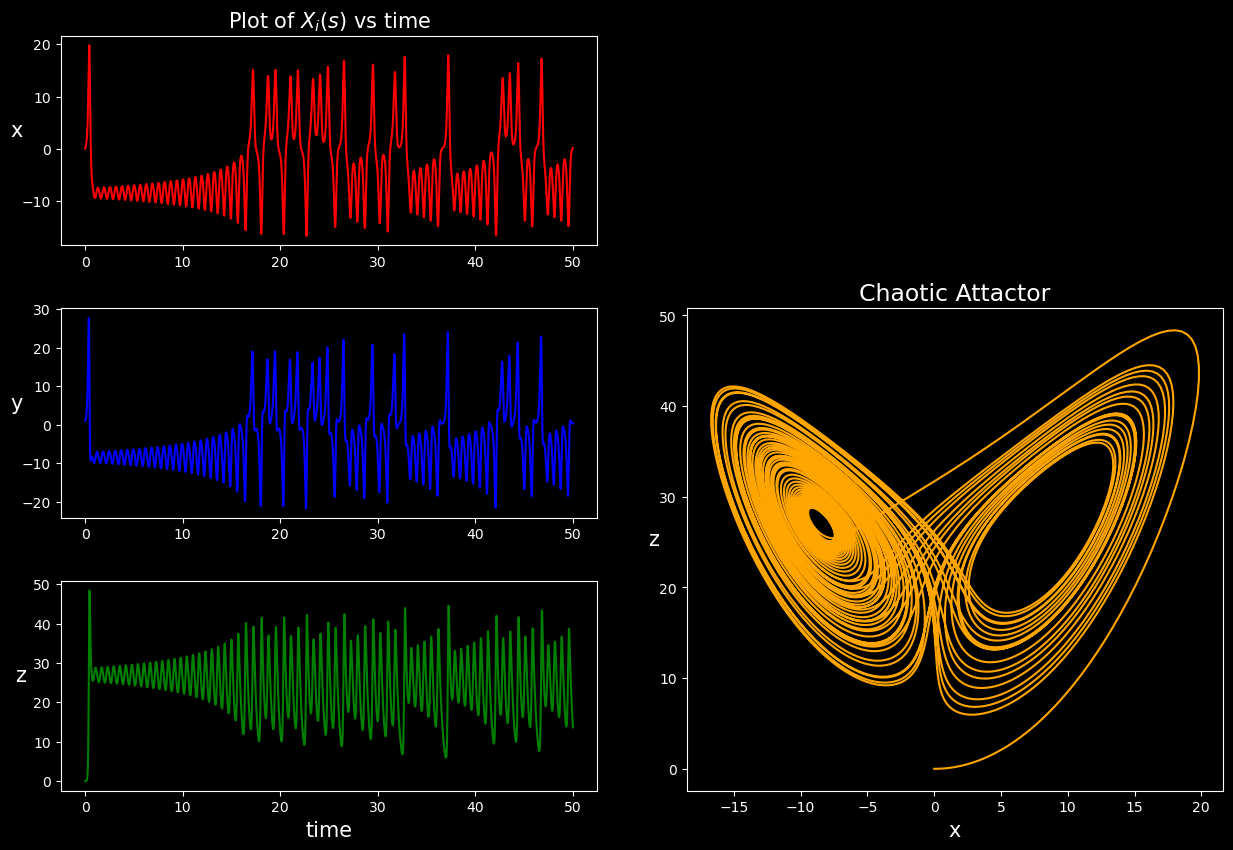

In [55]:
fig = plt.figure(figsize=(15,10), dpi=100)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

# slecting grids for timeplots
ax3 = fig.add_subplot(grid[2, 0:2])
ax1 = fig.add_subplot(grid[0, 0:2])
ax2 = fig.add_subplot(grid[1, 0:2])
# selecting grid for x-z plot
ax4 = fig.add_subplot(grid[1:,2:])

ax1.plot(t, q[:,0], 'r-')
ax1.set_ylabel('x', rotation=0, fontsize=15)
ax1.set_title('Plot of $X_i(s)$ vs time', fontsize=15)
ax2.plot(t, q[:,1], 'b-')
ax2.set_ylabel('y', rotation=0, fontsize=15)
ax3.plot(t, q[:,2], 'g-')
ax3.set_ylabel('z  ', rotation=0, fontsize=15)
ax3.set_xlabel('time', fontsize=15)

ax4.plot(q[:,0], q[:,2], color='orange')
ax4.set_xlabel('x', fontsize=15)
ax4.set_ylabel('z', rotation=0, fontsize=15)
ax4.set_title("Chaotic Attactor", fontsize=17)

#plt.savefig('Problem1.jpg', bbox_inches='tight', dpi=300)

# Solving heat equation using Euler and RK4 method

The heat equation is :      
$$
    \frac{dP(x,t)}{dt} = D\frac{d^2P(x,t)}{x^2}
$$
On discretizing the spatial variable, we have the following PDE to solve:            
$$
    \frac{d P_i(t)}{dt} = D \times \frac{P_{i+1}(t) + P_{i-1}(t) - 2P_i(t)}{\Delta x^2} \hspace{2ex} [i={1,2,3,\ldots, N-1}]
$$

For the implicit euler method, we also discretize the time, thus we have:
$$
    P_{n}(t_{j+1}) = P_n(t_j) + \frac{D\Delta t}{\Delta x^2}[P_{n-1}(t_j) - 2P_n(t_j) + P_{n+1}(t_j)]
$$
If you select $D$ such that $D\Delta t/\Delta x^2 = 1/2$, then the implicit euler method reduces to:
$$
    P_{n}(t_{j+1}) =  \frac{1}{2}[P_{n-1}(t_j) + P_{n+1}(t_j)]
$$


For solving using RK4 method, we first set $D/\delta x^2 = 1/2\Delta t$(from the given condition of the problem). Then we have N-2 set of 1st order ODE to solve given by:
$$
    \frac{d P_i(t)}{dt} = \frac{1}{2\Delta t} \times [P_{i+1}(t) + P_{i-1}(t) - 2P_i(t)] \hspace{4ex} [i={1,2,3,\ldots, N-1}]
$$
as the RK4 method returns the value of the solution from the grid-point $P(x_i,t_j)$ for the next time step i.e $P(x_i,t_{j+1})$.

In [3]:
# defining euler integration for the heat PDE

def euler_heat(q, derivs, t, h):
    """
    Euler integrator for heat equation.

    Parameters:
    ==========================================
    q:      initial parameters
    derivs: function to compute the derivatives
    t:      Current time
    h:      step size
    """
    q1 = derivs(t, q)
    return np.array(q1)

# defining derivative function for heat equation
def heat_derivs(t, q):
    """
    Returns the next time step for q[1:N-1]
    """
    q1 = np.zeros(len(q))
    for i in range(len(q)-2):
        q1[i+1] = 0.5*(q[i] + q[i+2])
    return q1

In [14]:
# defining derivative function for heat equation for Rk4
def heat_derivs_rk4(t, q):
    """
    Returns the next time step for q[1:N-1]
    """
    q1 = np.zeros(len(q))
    for i in range(len(q)-2):
        q1[i+1] = (0.5/dt)*(q[i] + q[i+2]-2*q[i+1])
    return q1
    

In [15]:
# time array
t_start = 1
t_end   = 100
dt_samples =[0.01, 0.05, 0.1]   # time step size

# array to store finte differnce grid for different time steps
P_euler = []
P_rk4   = []

# iterating over the time step size
for dt in dt_samples:    
    t = np.arange(t_start, t_end, dt)

    # initial gaussian solution
    dx = 0.01 # spatial step size
    x0 = np.arange(-2,2,dx)
    # defining constant
    D = (dx**2)/(2*dt)
    p0 = (1/(np.sqrt(2*np.pi)*2*D))*np.exp(-x0**2/(4*D))

    # defining finite difference grid
    p = np.zeros((len(t), len(x0))) # this already sets the boundary values to 0
    p[0,:] = p0/max(p0)
    p_rk4 = p.copy()

    # obtaining the solution with euler integration
    print("Euler integration for time step :", dt)
    for i in range(len(t)-1):
        p[i+1,:] = euler_heat(p[i,:], heat_derivs, t[i], dt)
    P_euler.append(p)

    # obtaining the solution with RK4
    print("Obtaining the solution with RK4 for time step :",dt)
    for i in range(len(t)-1):
        p_rk4[i+1,:] = RK4(p_rk4[i,:], heat_derivs_rk4, t[i], dt)
    P_rk4.append(p_rk4)


Euler integration for time step : 0.01
Obtaining the solution with RK4 for time step : 0.01
Euler integration for time step : 0.05
Obtaining the solution with RK4 for time step : 0.05
Euler integration for time step : 0.1
Obtaining the solution with RK4 for time step : 0.1


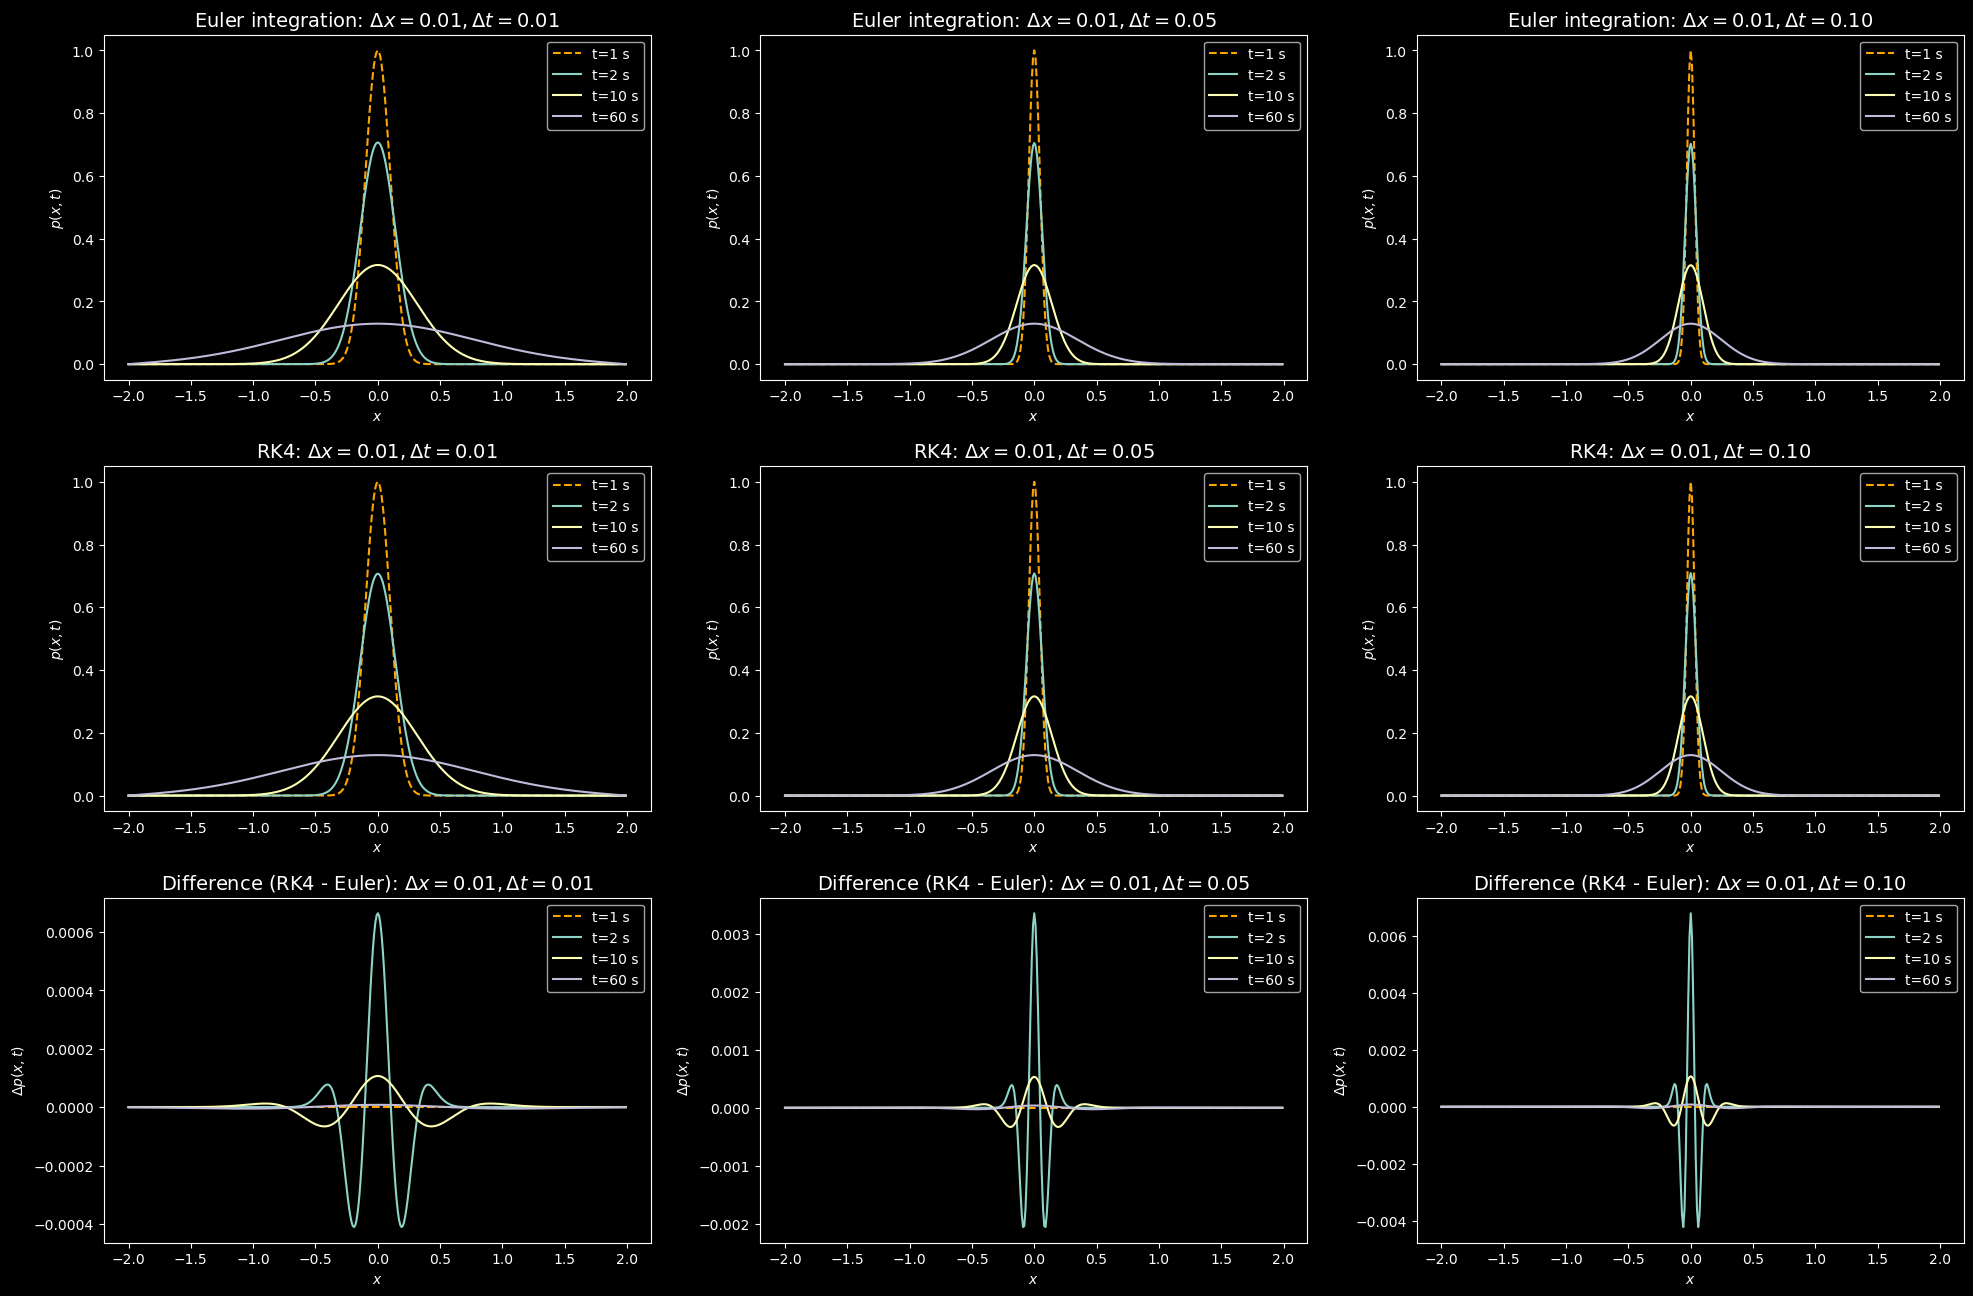

In [16]:
# ploting the solution for t=1,2,20,80
T = [2,10,60]

# creating subplots for ploting the solution for different time steps for euler and rk4 with error
fig, axs = plt.subplots(3, 3, figsize=(24,16), dpi=100, gridspec_kw={'hspace': 0.25, 'wspace': 0.2})


# ploting euler solution for different time steps in first row
for i in range(3):
    axs[0,i].plot(x0, P_euler[i][0,:], '--',c='orange', label='t=1 s')
    # selcting time index
    for j in range(3):
        axs[0,i].plot(x0, P_euler[i][int((T[j]-1)/dt_samples[i]),:], label='t=%d s'%T[j])
    axs[0,i].legend(loc='best')
    axs[0,i].set_title('Euler integration: $\\Delta x=0.01, \\Delta t=%2.2f$'%dt_samples[i], fontsize=14)
    axs[0,i].set_ylabel('$p(x,t)$', fontsize=10)
    axs[0,i].set_xlabel('$x$', fontsize=10)

# ploting rk4 solution for different time steps in second row
for i in range(3):
    axs[1,i].plot(x0, P_rk4[i][0,:], '--',c='orange', label='t=1 s')
    # selcting time index
    for j in range(3):
        axs[1,i].plot(x0, P_rk4[i][int((T[j]-1)/dt_samples[i]),:], label='t=%d s'%T[j])
    axs[1,i].legend(loc='best')
    axs[1,i].set_title('RK4: $\\Delta x=0.01, \\Delta t=%2.2f$'%dt_samples[i], fontsize=14)
    axs[1,i].set_ylabel('$p(x,t)$', fontsize=10)
    axs[1,i].set_xlabel('$x$', fontsize=10)

# plotting difference between euler and rk4 solution for different time steps in third row
for i in range(3):
    axs[2,i].plot(x0, P_rk4[i][0,:]-P_euler[i][0,:], '--',c='orange', label='t=1 s')
    # selcting time index
    for j in range(3):
        axs[2,i].plot(x0, P_rk4[i][int((T[j]-1)/dt_samples[i]),:]-P_euler[i][int((T[j]-1)/dt_samples[i]),:], label='t=%d s'%T[j])
    axs[2,i].legend(loc='best')
    axs[2,i].set_title('Difference (RK4 - Euler): $\\Delta x=0.01, \\Delta t=%2.2f$'%dt_samples[i], fontsize=14)
    axs[2,i].set_ylabel('$\\Delta p(x,t)$', fontsize=10)
    axs[2,i].set_xlabel('$x$', fontsize=10)

# lt.savefig("Problem2.jpg", bbox_inches='tight', dpi=300)